In [157]:
# imports:

In [350]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from ast import literal_eval # Transform/Parse a string-list into a proper list.
import requests # GET requets to scrap a url/website
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [351]:
# data preprossesing:
# first: loading the csv file into dataframe
#     then, replacing each variable into number and by using minMaxScalar changing the vaues between 0-1
#     dropping all the nan values

In [352]:
df = pd.read_csv ('data.csv')
df["gender"].replace({"Male":0,"Female":1,"Other":2}, inplace=True)
df["ever_married"].replace({"Yes":0,"No":1}, inplace=True)
df["work_type"].replace({"Private":0,"Govt_job":1,"Self-employed":2,"children":3,"Never_worked":4}, inplace=True)
df["smoking_status"].replace({"formerly smoked":0,"never smoked":1,"smokes":2,"Unknown":3,"formerly smoked":4}, inplace=True)

df.drop('id', inplace=True, axis=1)
df.drop('Residence_type', inplace=True, axis=1)


scaler = MinMaxScaler()
scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

scaler.fit(df[['avg_glucose_level']])
df['avg_glucose_level'] = scaler.transform(df[['avg_glucose_level']])



df=df.rename(columns={'Unnamed: 0':'inx'})

df = df.dropna()
df = df.reset_index()

df.head()


,index,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0.816895,0,1,0,0,0.801265,36.6,4,1
1,2,0,0.975586,0,1,0,0,0.234512,32.5,1,1
2,3,1,0.597168,0,0,0,0,0.536008,34.4,2,1
3,4,1,0.963379,1,0,0,2,0.549349,24.0,1,1
4,5,0,0.987793,0,0,0,0,0.605161,29.0,4,1


In [353]:
# feature selecting:
#     by SelectKBest library, we choose the top five most significent features in the data and used them

In [354]:
X = df.iloc[:,0:9]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))

               Specs          Score
0              index  508239.956331
3       hypertension      90.543821
4      heart_disease      88.779204
2                age      38.452374
5       ever_married      35.384105
8                bmi      18.814363
7  avg_glucose_level      17.198932
6          work_type      11.740406
1             gender       0.099242


In [355]:
# unbalanced data:

0    4700
1     209
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

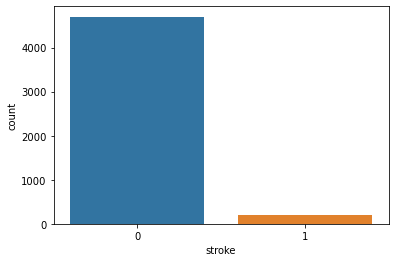

In [356]:
print(df['stroke'].value_counts())
sns.countplot(df['stroke'])

(3681, 4) (3681,)
(1228, 4) (1228,)
Accuracy: 0.9405537459283387
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1176
           1       0.11      0.06      0.08        52

    accuracy                           0.94      1228
   macro avg       0.54      0.52      0.52      1228
weighted avg       0.92      0.94      0.93      1228



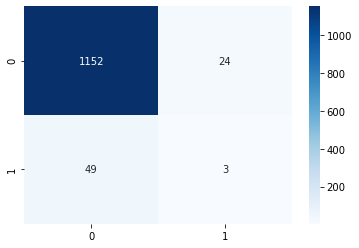

In [357]:
index_list=['age','avg_glucose_level','ever_married','hypertension']
label_type = 'stroke'

stat_lis=[df[str(i)] for i in index_list]
X=np.stack(stat_lis).T
y = np.stack(df[label_type])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,  # train
                                                    random_state=66, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = ExtraTreesClassifier(n_estimators= 150)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
predictions = model.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 
print(classification_report(true_labels, predictions))


In [358]:
# resampelling the data to create a balanced one by using resample:

(6090, 5) (6090,)
(2680, 5) (2680,)


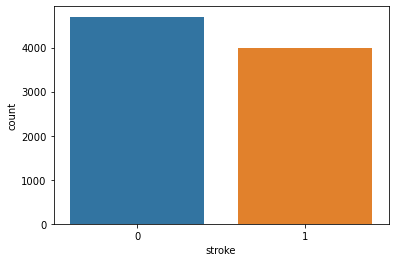

In [402]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['stroke']==0)] 
df_minority = df[(df['stroke']==1)] 

df_minority = df_minority.reset_index()
df_minority1 = df_minority.loc[df_minority['level_0'] >= 70]
df_minority2 = df_minority.loc[df_minority['level_0'] < 70]

# upsample minority class
df_minority_upsampled = resample(df_minority1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4000, # to match majority class
                                 random_state=66)  # reproducible results


df_upsampled = pd.concat([df_minority_upsampled, df_majority])

df_upsampled['stroke'].value_counts()
sns.countplot(df_upsampled['stroke'])

index_list=['heart_disease','age','avg_glucose_level','ever_married','hypertension']
label_type = 'stroke'
stat_lis=[df_upsampled[str(i)] for i in index_list]
X=np.stack(stat_lis).T
y = np.stack(df_upsampled[label_type])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,  # train
                                                    random_state=66)

stat_lis=[df_minority2[str(i)] for i in index_list]
X2=np.stack(stat_lis).T
arr = np.asarray(X2)
X_test = np.concatenate((arr,X_test), axis=0)
y2 = np.stack(df_minority2[label_type])
arr = np.asarray(y2)
y_test = np.concatenate((arr,y_test), axis=0)






print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [403]:
# first model: extraTree

Accuracy: 0.9880459770114942
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1175
           1       0.97      1.00      0.99      1000

    accuracy                           0.99      2175
   macro avg       0.99      0.99      0.99      2175
weighted avg       0.99      0.99      0.99      2175



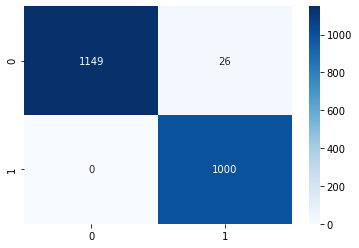

In [404]:


stat_lis=[df_upsampled[str(i)] for i in index_list]
X=np.stack(stat_lis).T
y = np.stack(df_upsampled[label_type])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,  # train
                                                    random_state=66,stratify=y)

model = ExtraTreesClassifier(n_estimators= 150)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
predictions = model.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 
print(classification_report(true_labels, predictions))

In [405]:
# second model: KNeighborsClassifier, using k=4

Accuracy: 0.9586206896551724
[[1085   90]
 [   0 1000]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1175
           1       0.92      1.00      0.96      1000

    accuracy                           0.96      2175
   macro avg       0.96      0.96      0.96      2175
weighted avg       0.96      0.96      0.96      2175



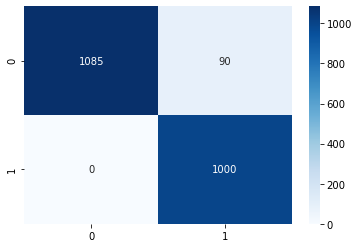

In [406]:
scaler = StandardScaler()
scaler.fit(X_train)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
heatma = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(y_test), 
                      yticklabels=np.unique(y_test)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [407]:
# third model: RandomForest

#### 

Accuracy: 0.9875862068965517
[[1148   27]
 [   0 1000]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1175
           1       0.97      1.00      0.99      1000

    accuracy                           0.99      2175
   macro avg       0.99      0.99      0.99      2175
weighted avg       0.99      0.99      0.99      2175



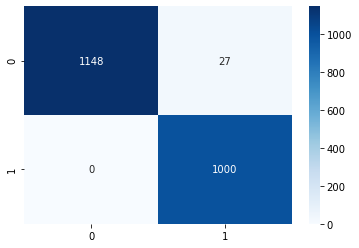

In [408]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
heatma = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(y_test), 
                      yticklabels=np.unique(y_test)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [409]:
# forth: XGBClassifier

Accuracy: 0.9825287356321839
[[1137   38]
 [   0 1000]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1175
           1       0.96      1.00      0.98      1000

    accuracy                           0.98      2175
   macro avg       0.98      0.98      0.98      2175
weighted avg       0.98      0.98      0.98      2175



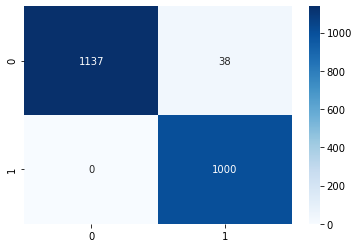

In [410]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
heatma = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(y_test), 
                      yticklabels=np.unique(y_test)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
